In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [29]:
iris = datasets.load_iris()
class_names = iris.target_names  
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)  
iris_df['target'] = iris.target
iris_df['target'].replace({0:'setosa', 1:'versicolor', 2:"virginica"}, inplace=True)

In [30]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
iris_df["target"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [33]:
## just versicolor and setosa
iris_df  = iris_df[(iris_df["target"] == "setosa") | ( iris_df["target"] == "versicolor")]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [50]:
from sklearn.model_selection import train_test_split

X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['target']


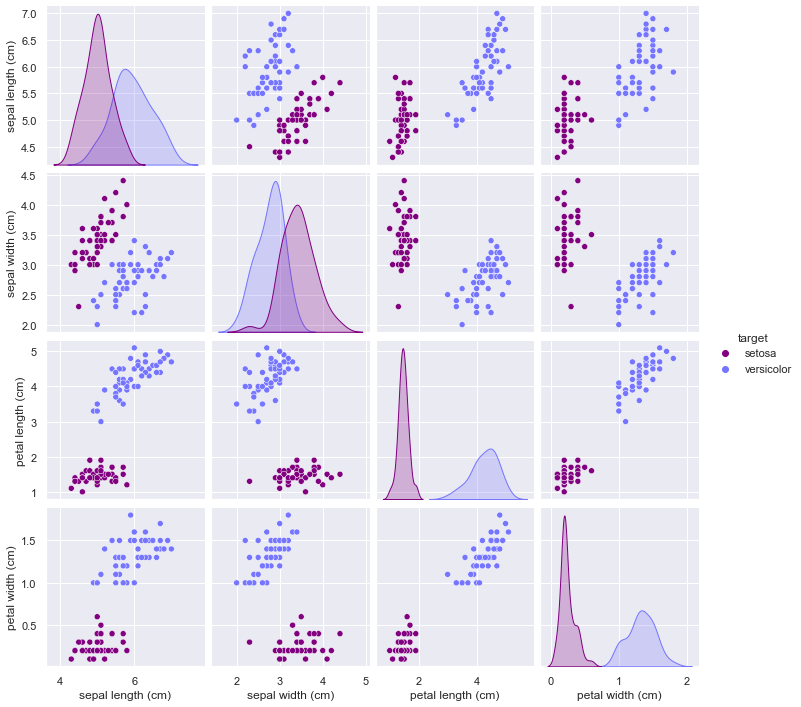

In [51]:
palette = {'setosa': 'purple', 'versicolor': '#7575FF'}
g = sns.pairplot(iris_df, vars = iris_df.columns[0:4], hue="target", palette=palette)

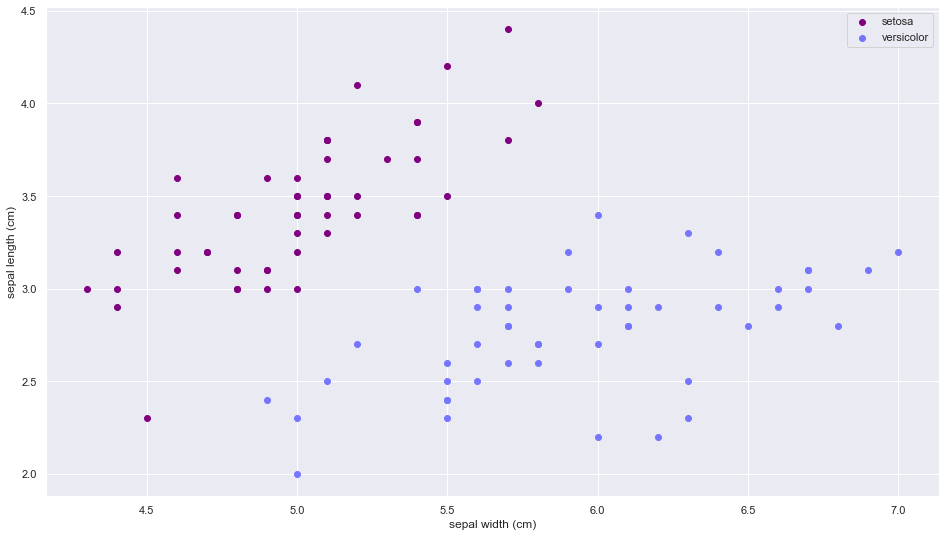

In [92]:

plt.figure(figsize= (16,9))
plt.scatter(iris_df[iris_df["target"] == "setosa"]["sepal length (cm)"],iris_df[iris_df["target"] == "setosa"]["sepal width (cm)"],c="purple", label='setosa')
plt.scatter(iris_df[iris_df["target"] == "versicolor"]["sepal length (cm)"],iris_df[iris_df["target"] == "versicolor"]["sepal width (cm)"],c="#7575FF", label='versicolor')

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.legend()
plt.show()

In [87]:

y = np.where(iris_df["target"] == "setosa", -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=8)
# X_train, y_train




weights :  [ -3.     8.38 -13.42]


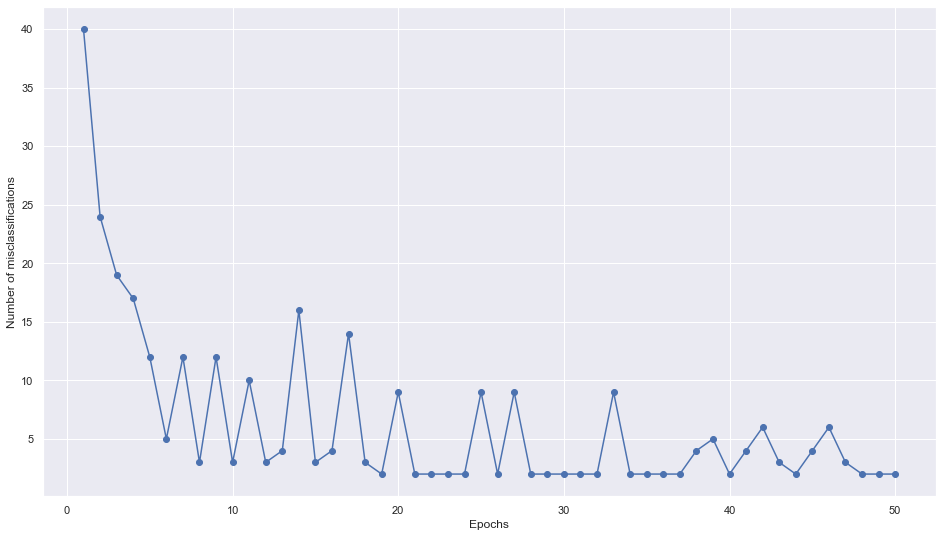

In [93]:
plt.figure(figsize=(16, 9))
class Perceptron(object):
   def __init__(self, rate, epoch ):
      self.rate = rate
      self.epoch = epoch

   def fit(self, X, y):

      self.weight = np.zeros(1 + X.shape[1])
      self.errors = []

      for i in range(self.epoch):
         err = 0
         for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
         self.errors.append(err)
      
      print("weights : ",self.weight )
      return self

   def net_input(self, X):
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, -1)


pn = Perceptron(0.1, 50)
X_select = np.array(X_train[[ "sepal length (cm)", "sepal width (cm)"]])
pn.fit(X_select, y_train)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [89]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
   markers = ('o', 'x')
   colors = ('purple', '#7575FF')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


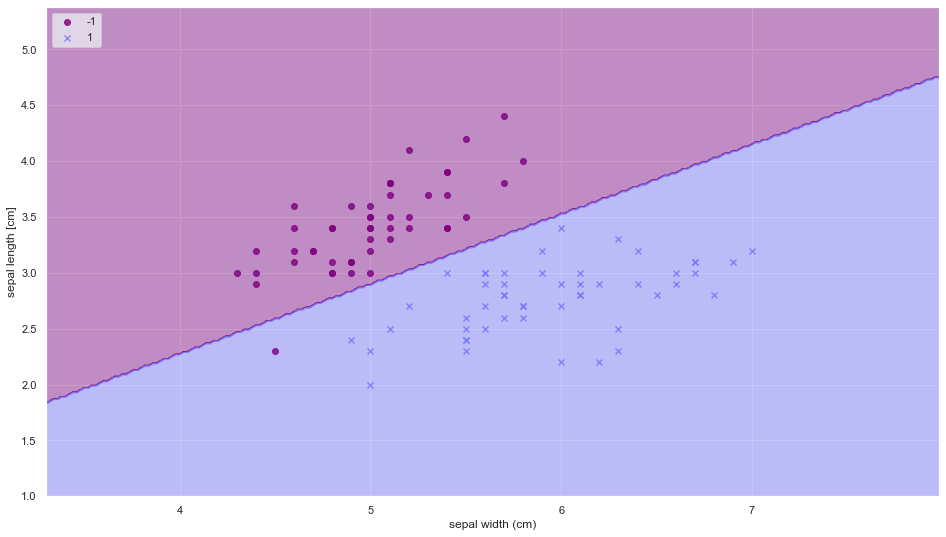

In [90]:
plt.figure(figsize=(16, 9))
plot_decision_regions(X_select, y_train, classifier=pn)
plt.xlabel("sepal width (cm)")
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.show()